In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.preprocessing import OneHotEncoder
from sksurv.metrics import concordance_index_censored

In [23]:
data = pd.read_csv('dataset/X_Y_merged.csv')
data.head()

,CompNo,yyyy,mm,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,sigma,liqfinlevel,lqfintrend,DTDmedianFin,DTDmedianNonFin,dummy297fin,EventDate,Event_type,Sector_Number,Exchange
0,15984,1999,3,0.167570,0.006248,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,2.324205,0,199903,0,12.0,15
1,15984,1999,4,0.200972,0.006487,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,2.373554,0,199904,2,17.0,15
2,15984,1999,6,0.210673,0.007457,NaN,NaN,0.447325,0.000000e+00,0.00932,...,0.276896,0.0,0.0,0.0,2.455890,0,199906,2,12.0,15
3,15984,1999,9,0.261256,0.007744,4.779150,0.100454,0.447325,0.000000e+00,0.00932,...,0.238643,0.0,0.0,0.0,2.499298,0,199909,2,99.0,15
4,15984,2000,1,0.089239,0.011089,4.966794,-0.019877,0.447325,-5.550000e-17,0.00932,...,0.219866,0.0,0.0,0.0,2.630245,0,200001,2,19.0,15


In [33]:
# Data preprocessing
# X = data.drop(['status_label','company_name', "year"], axis=1)  # Features
# data['transformed_status_label'] = data['status_label'].apply(lambda x: 0 if x == 'alive' else 1)
# data['transformed_status_label'] = np.where(data['status_label'] == 'alive', False, True)
# y = data['transformed_status_label']  # Target
# y_array = np.array(data['transformed_status_label'])
# data['transformed_year'] = data['year'].apply(lambda x: x - 1999)
# transformed_year_array = np.array(data['transformed_year'])
# data_x_numeric = OneHotEncoder().fit_transform(X)
# data_x_numeric.head()

# data_y = np.core.records.fromarrays([y_array, transformed_year_array], names=['transformed_status_label', 'transformed_year'])

# print(data_y)

# drop data when year less than 1999
df = data[data['yyyy'] >= 1999]

df['transformed_status'] = df['Event_type'].map(lambda x : True if x == 1 else False)
df['transformed_year'] = df['yyyy'].apply(lambda x: x - 1999)

df.head()

C:\Users\Melissa\AppData\Local\Temp\ipykernel_24780\611717684.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_status'] = df['Event_type'].map(lambda x : True if x == 1 else False)
C:\Users\Melissa\AppData\Local\Temp\ipykernel_24780\611717684.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_year'] = df['yyyy'].apply(lambda x: x - 1999)


array([ 0,  1,  2,  4,  6,  7,  8,  9, 24, 17, 18, 19, 20, 21, 22, 10, 11,
       12, 13, 14, 15, 16, 23,  5,  3], dtype=int64)

Text(0.5, 0, 'time $t$')

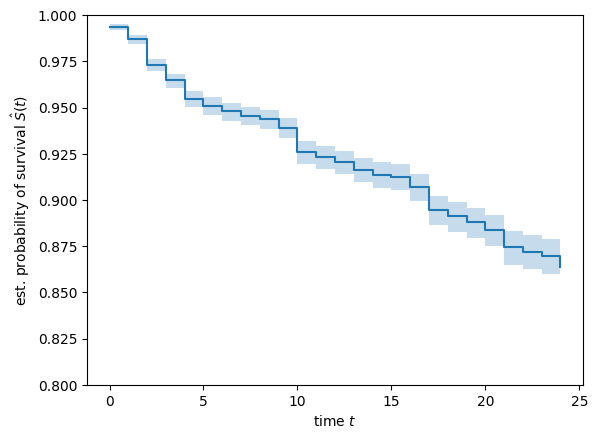

In [36]:
# Kaplan meier estimator

time, survival_prob, conf_int = kaplan_meier_estimator(
    df["transformed_status"], df["transformed_year"], conf_type="log-log"
)

plt.step(time, survival_prob, where="post")
plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")
plt.ylim(0.8, 1)
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

In [ ]:
# Data preprocessing
X = df.drop(['status_label','company_name', "year"], axis=1)  # Features
y = df['status_label']  # Target


data_x_numeric = OneHotEncoder().fit_transform(data_x)
data_x_numeric.head()

In [4]:
from sklearn import set_config
from sksurv.linear_model import CoxPHSurvivalAnalysis

set_config(display="text")  # displays text representation of estimators

estimator = CoxPHSurvivalAnalysis()
estimator.fit(data_x_numeric, data_y)

c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\sksurv\linear_model\coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=1.44355e-31): result may not be accurate.
  delta = solve(
c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\sksurv\linear_model\coxph.py:173: RuntimeWarning: overflow encountered in exp
  risk_set += np.exp(xw[k])
c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\sksurv\linear_model\coxph.py:470: RuntimeWarning: invalid value encountered in double_scalars
  res = np.abs(1 - (loss_new / loss))
c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\sksurv\linear_model\coxph.py:194: RuntimeWarning: overflow encountered in exp
  exp_xw = np.exp(offset + np.dot(x, w))
c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\sksurv\linear_model\coxph.py:228: RuntimeWarning: invalid value encountered in multiply
  risk_set_x += exp_xw[k] * xk
c:\Users\Me

ValueError: search direction contains NaN or infinite values